# **Step 1: Import Required Libraries**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# **Step 2: Load and Inspect the Dataset**

Load the dataset and examine its structure.

In [2]:
# Load the dataset
data = pd.read_csv('/content/car data.csv')

# Display the first few rows to understand the structure
print(data.head())
print(data.info())  # Check for data types and missing values
print(data.describe())  # Summary statistics of numerical columns


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

# **Step 3: Data Exploration and Visualization**

Visualize relationships between features to understand the dataset better.

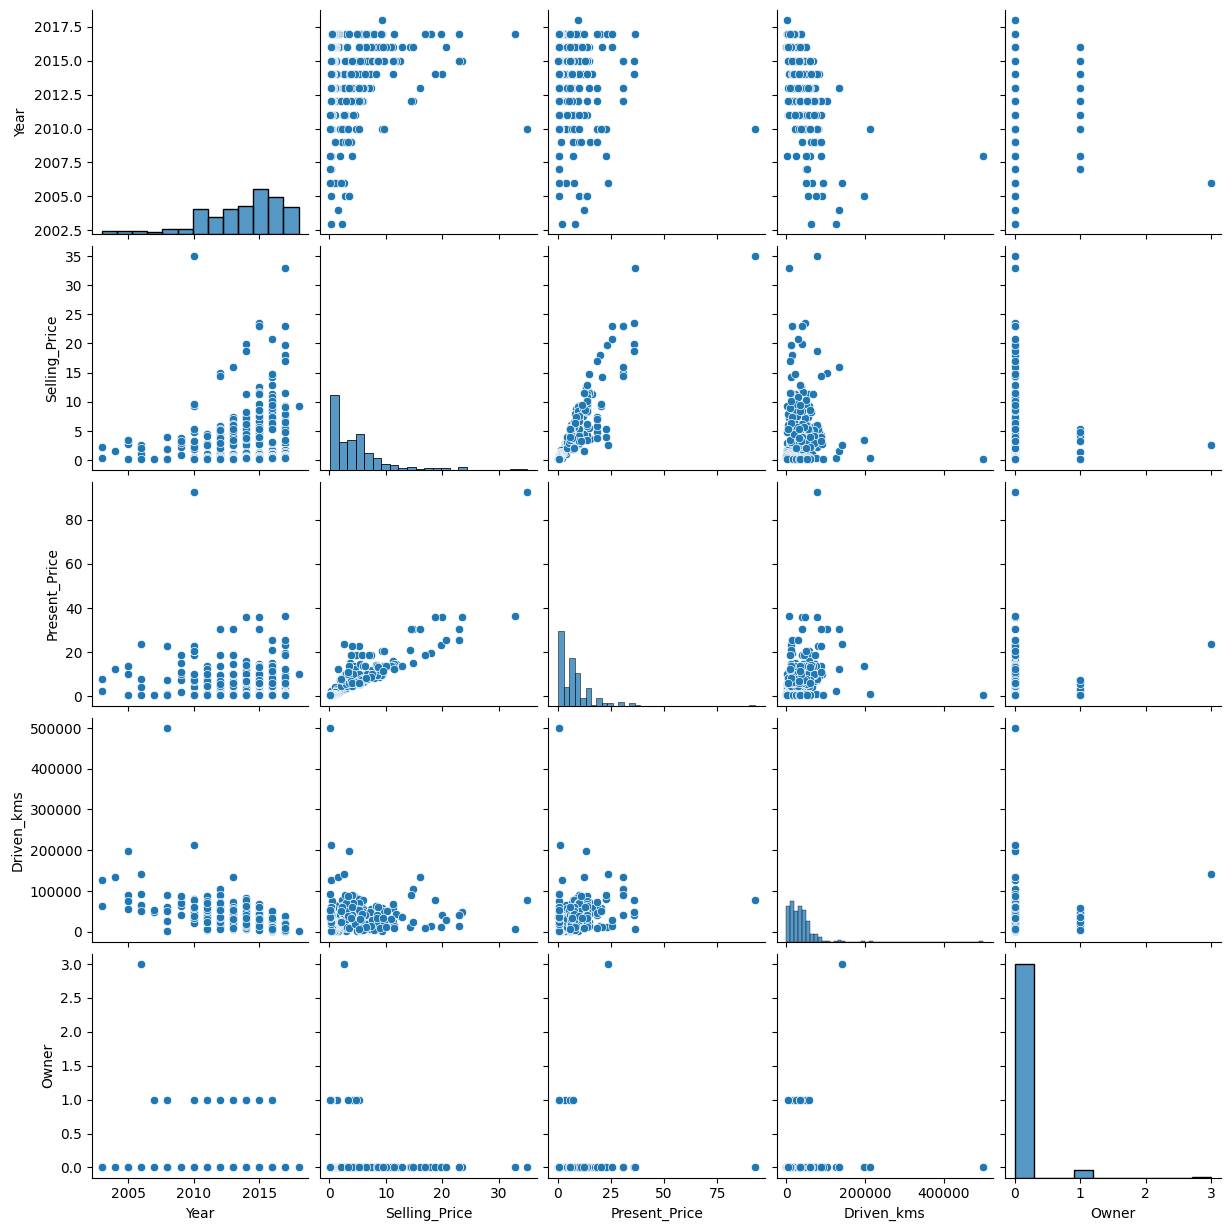

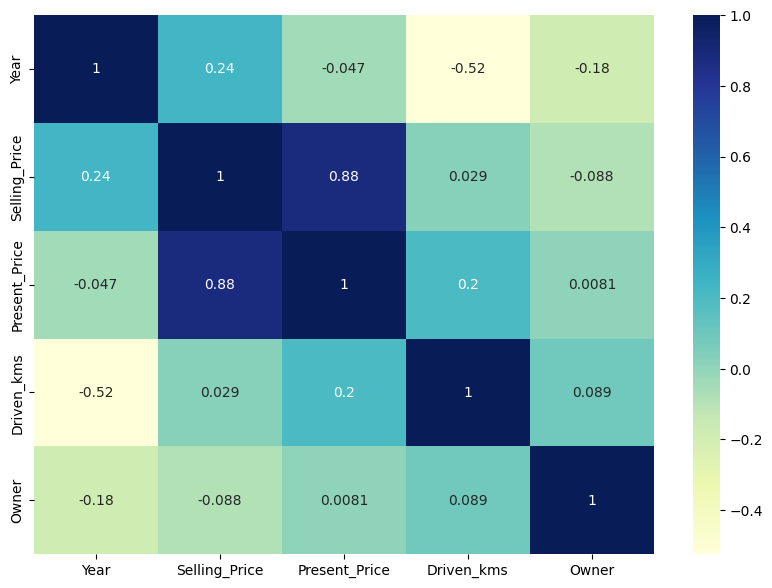

In [3]:
# Pairplot to observe relationships between features
sns.pairplot(data)
plt.show()

# Heatmap to display correlation among numerical features
# Selecting only numeric columns for correlation heatmap
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")
plt.show()


# **Step 4: Data Preprocessing**

Define the Target and Features.

One-Hot Encode Categorical Features.

Scale Numerical Features.

In [4]:
# Identify the features (X) and target variable (y)
# Replace 'Selling_Price' with the correct column name for the price if it’s different
X = data.drop(columns='Selling_Price')  # Adjust to the actual price column name
y = data['Selling_Price']  # Target column for car prices

# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Create preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline(steps=[('scaler', StandardScaler())])
categorical_pipeline = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])

# Combine pipelines into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Step 5: Model Training and Evaluation**

Train different regression models and evaluate their performance.

In [6]:
# Update the categorical pipeline with handle_unknown="ignore"
categorical_pipeline = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', handle_unknown="ignore"))])

# Combine pipelines into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Define a dictionary to store different models
models = {
    "Linear Regression": Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())]),
    "Decision Tree": Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeRegressor(random_state=42))]),
    "Random Forest": Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(random_state=42))])
}

# Train and evaluate each model
for model_name, model_pipeline in models.items():
    # Train the model
    model_pipeline.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model_pipeline.predict(X_test)

    # Evaluation metrics
    print(f"\nModel: {model_name}")
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R^2 Score:", r2_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



Model: Linear Regression
Mean Absolute Error (MAE): 2.0365174391247036
Mean Squared Error (MSE): 9.22108685667924
Root Mean Squared Error (RMSE): 3.0366242534563344
R^2 Score: 0.5997025016423132

Model: Decision Tree
Mean Absolute Error (MAE): 0.6070491803278688
Mean Squared Error (MSE): 0.8712836065573771
Root Mean Squared Error (RMSE): 0.9334257370339524
R^2 Score: 0.9621766226166334

Model: Random Forest
Mean Absolute Error (MAE): 0.6046213114754101
Mean Squared Error (MSE): 0.7849637218032788
Root Mean Squared Error (RMSE): 0.8859817841261065
R^2 Score: 0.9659238635289734


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# **Step 6: Save the Best Model**

After evaluating the models, choose the one with the highest

𝑅

2

R

2
  score as the best model for car price prediction.

In [8]:
# Select the best model based on R^2 score
best_model_name = max(models, key=lambda name: r2_score(y_test, models[name].predict(X_test)))
print(f"\nBest Model: {best_model_name}")

# Save the best model for future use (Random Forest example)
import joblib
best_model = models["Random Forest"]
joblib.dump(best_model, 'car_price_prediction_model.pkl')



Best Model: Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


['car_price_prediction_model.pkl']